# 붓꽃 데이터 군집화

## k-means 클러스터링

### 데이터 셋(Dataset) 및 전처리

In [38]:
# 필요한 라이브러리
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [39]:
# 데이터셋 준비
from sklearn.datasets import load_iris

iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target
df_iris['target_names'] = df_iris.target.apply(lambda x: 'setosa' if x == 0\
    else ('versicolor' if x == 1 
    else 'virginica'))
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica
146,6.3,2.5,5.0,1.9,2,virginica
147,6.5,3.0,5.2,2.0,2,virginica
148,6.2,3.4,5.4,2.3,2,virginica


In [40]:
iris.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

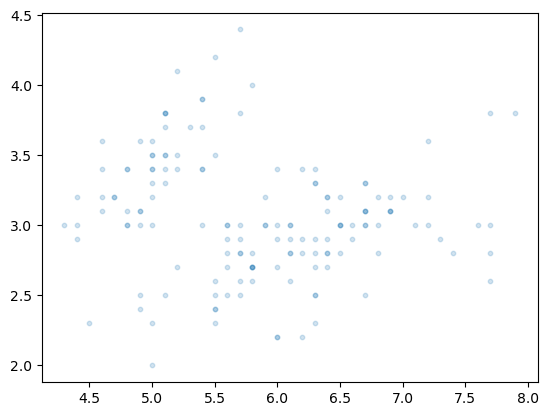

In [41]:
plt.scatter(x=df_iris['sepal length (cm)'], y=df_iris['sepal width (cm)'], alpha=0.2, s=10)

## K=2 인 경우

In [42]:
from sklearn.cluster import KMeans

X = df_iris[['sepal length (cm)', 'sepal width (cm)']]
model2 = KMeans(n_clusters=2, random_state=111)
model2.fit(X)

KMeans(n_clusters=2, random_state=111)

In [43]:
model2.cluster_centers_

array([[5.22409639, 3.1313253 ],
       [6.61044776, 2.96567164]])

In [44]:
model2.inertia_

58.20409278906673

In [45]:
pred2 = model2.predict(X)
df_iris['K=2'] = pred2
df_iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,target_names,K=2
0,5.1,3.5,1.4,0.2,0,setosa,0
1,4.9,3.0,1.4,0.2,0,setosa,0
2,4.7,3.2,1.3,0.2,0,setosa,0
3,4.6,3.1,1.5,0.2,0,setosa,0
4,5.0,3.6,1.4,0.2,0,setosa,0
...,...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,virginica,1
146,6.3,2.5,5.0,1.9,2,virginica,1
147,6.5,3.0,5.2,2.0,2,virginica,1
148,6.2,3.4,5.4,2.3,2,virginica,1


In [46]:
df_iris['K=2'].values

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0])

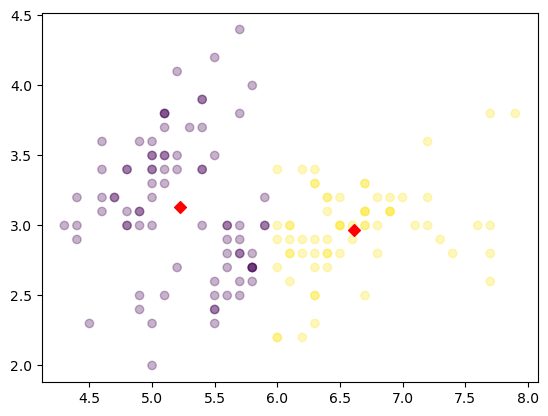

In [47]:
# model2 시각화

model2_df = pd.DataFrame(X, columns=iris.feature_names[:2])
model2_df['cluster'] = df_iris['K=2'].values
model2_df
plt.scatter(model2_df.iloc[:, 0], model2_df.iloc[:, 1], c=model2_df['cluster'], alpha=0.3)
plt.scatter(model2.cluster_centers_[:, 0], model2.cluster_centers_[:, 1], c='r', marker='D')

In [48]:
model2.cluster_centers_[:, 0]

array([5.22409639, 6.61044776])

## K=3 인 군집 만들기

In [49]:
model3 = KMeans(n_clusters=3, random_state=111)
model3.fit(X)

pred3 = model3.predict(X)
pred3

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 2, 1, 2, 1, 2, 1, 2, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1,
       1, 1, 1, 2, 2, 1, 1, 1, 1, 2, 1, 2, 1, 2, 1, 1, 2, 2, 1, 1, 1, 1,
       1, 2, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 1, 2, 1, 1, 2])

In [50]:
model3_df = pd.DataFrame(X, columns=iris.feature_names[:2])
model3_df['cluster'] = pred3
model3_df

,sepal length (cm),sepal width (cm),cluster
0,5.1,3.5,0
1,4.9,3.0,0
2,4.7,3.2,0
3,4.6,3.1,0
4,5.0,3.6,0
...,...,...,...
145,6.7,3.0,1
146,6.3,2.5,2
147,6.5,3.0,1
148,6.2,3.4,1


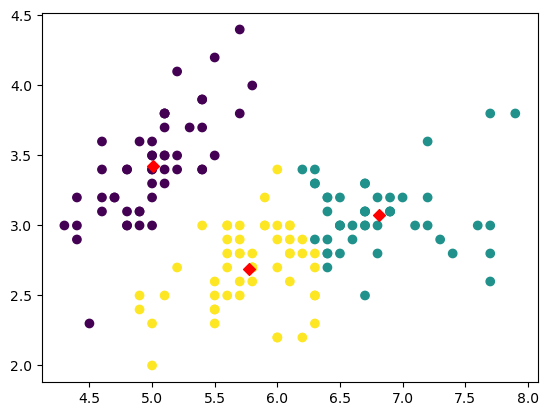

In [52]:
# model3 시각화

plt.scatter(model3_df.iloc[:, 0], model3_df.iloc[:, 1], c=model3_df.cluster)
plt.scatter(model3.cluster_centers_[:, 0], model3.cluster_centers_[:, 1], c='r', marker='D')

In [53]:
model3.inertia_

37.05070212765958

## 추가 연습
### k=5 로 군집 수행

##### 시각화 및 이너셔 구하기

In [54]:
from sklearn.cluster import KMeans

model5 = KMeans(n_clusters=5, random_state=111)
model5.fit(X)
model5_pred = model5.predict(X)

In [56]:
X

,sepal length (cm),sepal width (cm)
0,5.1,3.5
1,4.9,3.0
2,4.7,3.2
3,4.6,3.1
4,5.0,3.6
...,...,...
145,6.7,3.0
146,6.3,2.5
147,6.5,3.0
148,6.2,3.4


ValueError: x and y must be the same size

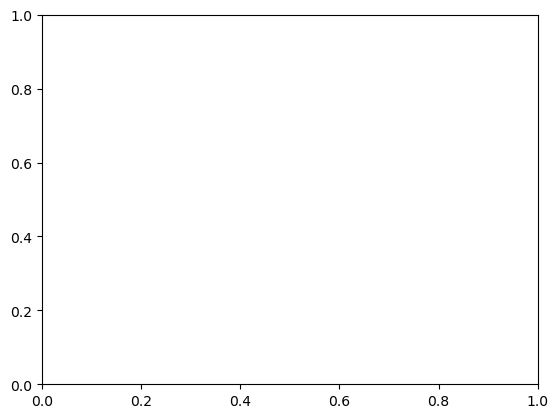

In [60]:
model5_df = pd.DataFrame(X, columns=iris.feature_names)
model5_df['cluster'] = model5_pred

plt.scatter(model5_df.iloc[:, :2], )

## 최적의 K 찾기: 엘보우 방식


In [61]:
k_list = range(2, 11)
inertias = []

for k in k_list:
    modelk =KMeans(n_clusters=k)
    modelk.fit(X)
    inertias.append(modelk.inertia_)

In [62]:
inertias

[58.20409278906673,
 37.05070212765958,
 27.9902120383037,
 21.004660660660665,
 17.58037494637495,
 14.753495845788954,
 12.788763481527548,
 11.238524327122155,
 9.584347178683387]

##### 군집의 개수 k에 따른 inertias 값 변화를 시각화

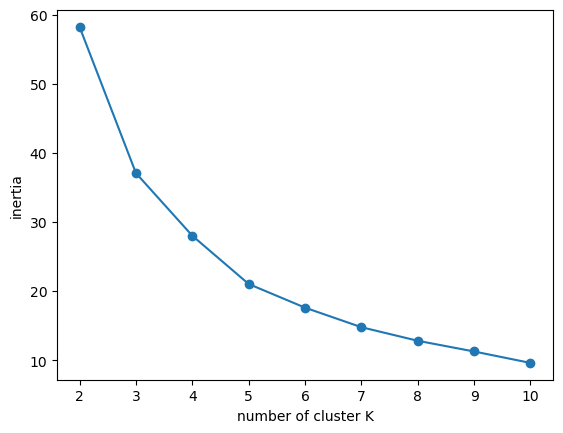

In [66]:
plt.plot(k_list, inertias, marker='o')
plt.xlabel('number of cluster K')
plt.ylabel('inertia')
plt.show()

##### k를 3으로 군집 개수 지정

# [실습] 다음의 데이터셋을 활용하여 KMeans 군집 모델을 구축하라

* 데이터셋 : clustering_dataset.csv

In [70]:
df = pd.read_csv('data/clustering_dataset.csv', usecols=[1, 2])
df

,x1,x2
0,-5.673888,9.134580
1,7.783390,-7.145758
2,7.532874,-4.235851
3,-1.497504,9.437434
4,-2.912560,6.562741
...,...,...
195,-1.438523,9.690181
196,-0.252837,10.182634
197,7.415080,-4.526361
198,-1.795357,8.488310


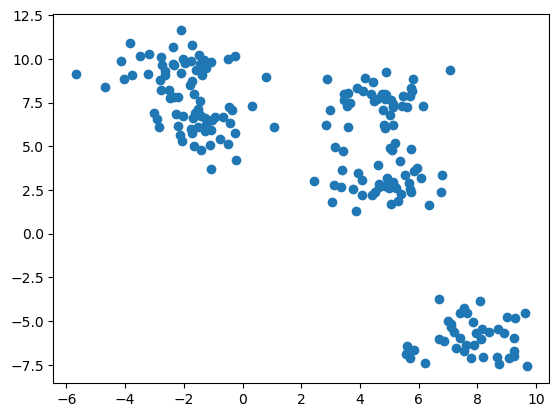

In [72]:
plt.scatter(df['x1'], df['x2'])

In [71]:
from sklearn.cluster import KMeans

k_list = range(2, 11)
inertias = []
for i in k_list:
    model = KMeans(n_clusters=i)
    model.fit(X)
    inertias.append(model.inertia_)


[58.20409278906673,
 37.05070212765958,
 27.9902120383037,
 21.004660660660665,
 17.33470189701897,
 15.548724192474195,
 12.951376282051285,
 11.160930357142856,
 9.750784235692427]

In [76]:
len(cluster)

150

In [75]:
model = KMeans(n_clusters=3)
model.fit(X)
cluster = model.predict(X)
df['cluster'] = cluster
df # 아.. X를 새로 선언해야하는데 거기부터 틀렸다

ValueError: Length of values (150) does not match length of index (200)

# 군집 평가(Cluster Evaluation) :  다음 파일로 이동